## Part 0: Importing and Extracting the Data

In [3]:
import zipfile
import os

# Path to the zip file
zip_file_path = "SVM_photos.zip"

# Destination directory to extract the files
extraction_dir = "SVM_photos"

# Create the directory if it doesn't exist
os.makedirs(extraction_dir, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

print(f"Files extracted to: {extraction_dir}")


BadZipFile: File is not a zip file

In [5]:
import os

# Check if the file exists and its size
zip_file_path = "SVM_photos.zip"
print(f"File exists: {os.path.exists(zip_file_path)}")
print(f"File size: {os.path.getsize(zip_file_path)} bytes")


File exists: True
File size: 2098200576 bytes


In [11]:
import shutil

try:
    shutil.unpack_archive(zip_file_path, extraction_dir)
    print(f"Successfully extracted to {extraction_dir} using shutil.")
except Exception as e:
    print(f"Extraction failed: {e}")


Successfully extracted to SVM_photos using shutil.


In [13]:
import os

# Path to the extracted folder
extraction_dir = "SVM_photos"

# Walk through the directory structure
for root, dirs, files in os.walk(extraction_dir):
    print(f"Directory: {root}")
    print(f"Subdirectories: {dirs}")
    print(f"Files: {files}")
    print("-" * 40)


Directory: SVM_photos
Subdirectories: ['dataset']
Files: []
----------------------------------------
Directory: SVM_photos\dataset
Subdirectories: ['dataset', 'test', 'train']
Files: []
----------------------------------------
Directory: SVM_photos\dataset\dataset
Subdirectories: ['test', 'train']
Files: []
----------------------------------------
Directory: SVM_photos\dataset\dataset\test
Subdirectories: ['freshapples', 'freshbanana', 'freshoranges', 'rottenapples', 'rottenbanana', 'rottenoranges']
Files: []
----------------------------------------
Directory: SVM_photos\dataset\dataset\test\freshapples
Subdirectories: []
Files: ['rotated_by_15_Screen Shot 2018-06-08 at 4.59.49 PM.png', 'rotated_by_15_Screen Shot 2018-06-08 at 5.00.35 PM.png', 'rotated_by_15_Screen Shot 2018-06-08 at 5.00.43 PM.png', 'rotated_by_15_Screen Shot 2018-06-08 at 5.01.01 PM.png', 'rotated_by_15_Screen Shot 2018-06-08 at 5.02.08 PM.png', 'rotated_by_15_Screen Shot 2018-06-08 at 5.02.54 PM.png', 'rotated_by_15

In [15]:
from collections import defaultdict

# Path to the test and train directories
test_dir = os.path.join(extraction_dir, "dataset/test")
train_dir = os.path.join(extraction_dir, "dataset/train")

# Function to count files in each subfolder
def count_files(base_dir):
    file_counts = defaultdict(int)
    for subfolder in os.listdir(base_dir):
        subfolder_path = os.path.join(base_dir, subfolder)
        if os.path.isdir(subfolder_path):
            file_counts[subfolder] = len(os.listdir(subfolder_path))
    return file_counts

# Count files in test and train folders
test_file_counts = count_files(test_dir)
train_file_counts = count_files(train_dir)

print("Test file counts:", dict(test_file_counts))
print("Train file counts:", dict(train_file_counts))


Test file counts: {'freshapples': 395, 'freshbanana': 381, 'freshoranges': 388, 'rottenapples': 601, 'rottenbanana': 530, 'rottenoranges': 403}
Train file counts: {'freshapples': 1693, 'freshbanana': 1581, 'freshoranges': 1466, 'rottenapples': 2342, 'rottenbanana': 2224, 'rottenoranges': 1595}


In [17]:
from PIL import Image
import random

# Helper function to preview random images
def preview_random_image(base_dir, category):
    category_path = os.path.join(base_dir, category)
    files = os.listdir(category_path)
    if files:
        random_file = random.choice(files)
        img_path = os.path.join(category_path, random_file)
        print(f"Previewing {img_path}")
        img = Image.open(img_path)
        img.show()

# Preview images from a category
preview_random_image(test_dir, "freshapples")
preview_random_image(train_dir, "rottenoranges")


Previewing SVM_photos\dataset/test\freshapples\rotated_by_45_Screen Shot 2018-06-08 at 5.18.37 PM.png
Previewing SVM_photos\dataset/train\rottenoranges\rotated_by_75_Screen Shot 2018-06-12 at 11.23.29 PM.png


In [21]:
# Check file extensions
def validate_file_extensions(base_dir, allowed_extensions):
    for subfolder in os.listdir(base_dir):
        subfolder_path = os.path.join(base_dir, subfolder)
        if os.path.isdir(subfolder_path):
            for file_name in os.listdir(subfolder_path):
                file_path = os.path.join(subfolder_path, file_name)
                if not file_path.endswith(tuple(allowed_extensions)):
                    print(f"Unexpected file: {file_path}")

# Validate for images
validate_file_extensions(test_dir, [".jpg", ".png"])
validate_file_extensions(train_dir, [".jpg", ".png"])


## Part 1: Setting up the Model

In [27]:
## Importing the Libraries

import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from PIL import Image

In [29]:
## Image preprocessing

def load_images_from_folder(base_dir, label_map, image_size=(64, 64)):
    images = []
    labels = []
    for label, folder_name in label_map.items():
        folder_path = os.path.join(base_dir, folder_name)
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            try:
                # Load and preprocess the image
                img = Image.open(file_path).resize(image_size).convert('RGB')
                img_array = np.array(img).flatten()  # Flatten the image
                images.append(img_array)
                labels.append(label)  # Assign the label
            except Exception as e:
                print(f"Error loading image {file_path}: {e}")
    return np.array(images), np.array(labels)

label_map = {
    0: "freshapples",
    1: "freshbanana",
    2: "freshoranges",
    3: "rottenapples",
    4: "rottenbanana",
    5: "rottenoranges",
}

train_dir = "SVM_photos/dataset/train"
test_dir = "SVM_photos/dataset/test"

X_train, y_train = load_images_from_folder(train_dir, label_map)
X_test, y_test = load_images_from_folder(test_dir, label_map)


In [31]:
# Normalize pixel values to range of 0 to 1

X_train = X_train / 255.0
X_test = X_test / 255.0

## Part 2: Running the Model

In [34]:
# Train the SVM model
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred = svm_model.predict(X_test)

In [36]:
# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 88.77%
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.84      0.88       395
           1       0.96      0.95      0.95       381
           2       0.90      0.88      0.89       388
           3       0.77      0.92      0.84       601
           4       0.97      0.96      0.97       530
           5       0.88      0.74      0.80       403

    accuracy                           0.89      2698
   macro avg       0.90      0.88      0.89      2698
weighted avg       0.89      0.89      0.89      2698



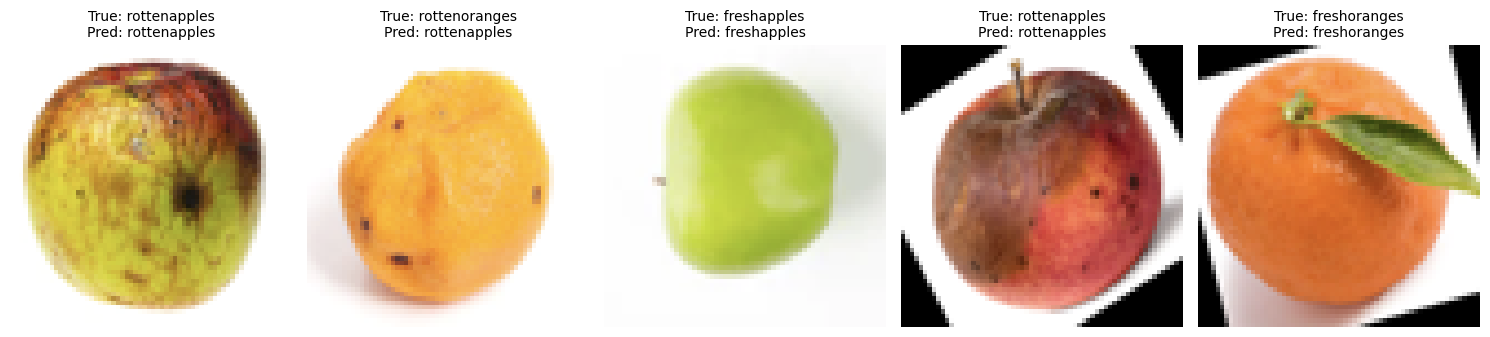

In [46]:
# Visualize predictions with reduced font size
def show_predictions(X, y_true, y_pred, label_map, num_images=5):
    indices = np.random.choice(len(X), num_images, replace=False)
    plt.figure(figsize=(15, 5))  # Adjust figure size for better readability
    for i, idx in enumerate(indices):
        img = X[idx].reshape(64, 64, 3)  # Reshape for display
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(f"True: {label_map[y_true[idx]]}\nPred: {label_map[y_pred[idx]]}", 
                  fontsize=10)  # Reduce fontsize here
        plt.axis('off')
    plt.tight_layout()  # Ensure layout doesn't overlap
    plt.show()

show_predictions(X_test, y_test, y_pred, label_map)


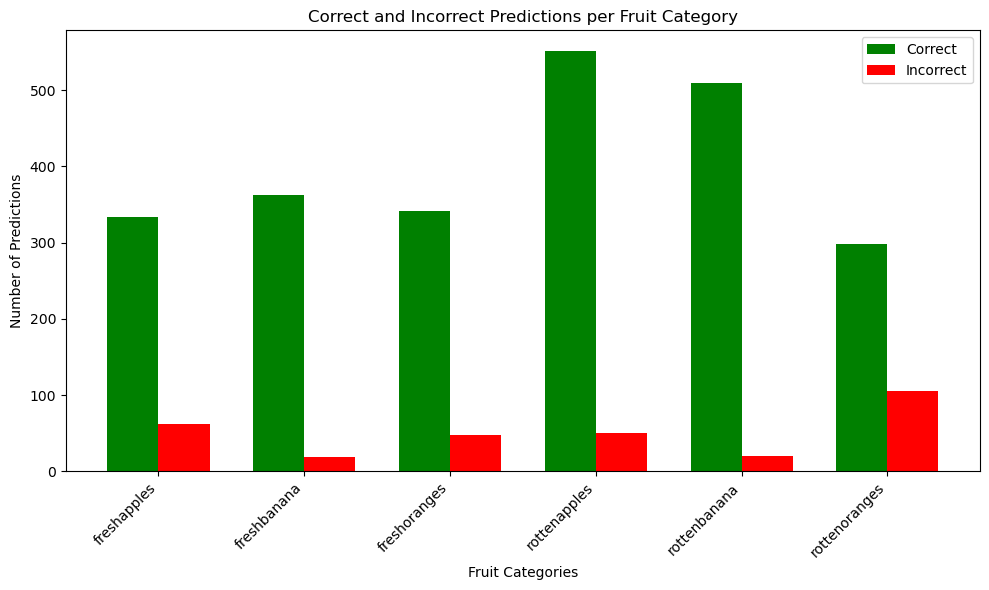

In [50]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# Function to count correct and incorrect predictions per category
def count_predictions_per_category(y_true, y_pred, label_map):
    correct = defaultdict(int)
    incorrect = defaultdict(int)
    
    for true, pred in zip(y_true, y_pred):
        category = label_map[true]
        if true == pred:
            correct[category] += 1
        else:
            incorrect[category] += 1
    
    return correct, incorrect

# Count correct and incorrect predictions
correct, incorrect = count_predictions_per_category(y_test, y_pred, label_map)

# Prepare data for the histogram
categories = list(label_map.values())
correct_counts = [correct[cat] if cat in correct else 0 for cat in categories]
incorrect_counts = [incorrect[cat] if cat in incorrect else 0 for cat in categories]

# Create a bar plot
x = np.arange(len(categories))  # The label locations
width = 0.35  # The width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, correct_counts, width, label='Correct', color='g')
bars2 = ax.bar(x + width/2, incorrect_counts, width, label='Incorrect', color='r')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Fruit Categories')
ax.set_ylabel('Number of Predictions')
ax.set_title('Correct and Incorrect Predictions per Fruit Category')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


## Part 3: Grid Search Cross Validation 

In [53]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC

svm_model = SVC()

param_grid = {
    'C': [0.1, 1, 10, 100],         # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001], # Kernel coefficient for RBF
    'kernel': ['linear', 'rbf']     # Kernel types
}

grid_search = GridSearchCV(estimator=svm_model, 
                           param_grid=param_grid, 
                           scoring='accuracy',  # Metric for evaluation
                           cv=5,               # 5-fold cross-validation
                           verbose=2, 
                           n_jobs=-1)          # Use all CPU cores

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Best Cross-Validation Score: 0.8851452283903101


In [55]:
gamma_scale = 1 / (X_train.shape[1] * np.var(X_train))
print("Gamma scale value:", gamma_scale)

Gamma scale value: 0.0006519582626591172


In [57]:
## Do the same but with new values of gamma, less of kernel

svm_model = SVC()

param_grid = {
    'C': [1, 10, 100],         # Regularization parameter
    'gamma': ['scale', 0.0012, 0.0006], # Kernel coefficient for RBF
    'kernel': ['rbf']     # Kernel types
}

grid_search = GridSearchCV(estimator=svm_model, 
                           param_grid=param_grid, 
                           scoring='accuracy',  # Metric for evaluation
                           cv=5,               # 5-fold cross-validation
                           verbose=2, 
                           n_jobs=-1)          # Use all CPU cores

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Score: 0.8842285543623202


## FINAL: Run SVM with Optimal Hyperparameters

In [61]:
svm_model = SVC(kernel='rbf', C=100, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

In [63]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 94.81%
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       395
           1       0.96      0.98      0.97       381
           2       0.95      0.93      0.94       388
           3       0.92      0.95      0.93       601
           4       0.99      0.97      0.98       530
           5       0.93      0.91      0.92       403

    accuracy                           0.95      2698
   macro avg       0.95      0.95      0.95      2698
weighted avg       0.95      0.95      0.95      2698



## Running SVM on Bigger Dataset

In [7]:
import zipfile
import os

dataset_dir2 = "SVM_Photos2.zip"  # Base dataset directory
train_dir2 = os.path.join(dataset_dir2, "Train")
test_dir2 = os.path.join(dataset_dir2, "Test")

extraction_dir2 = "SVM_Photos2"

# Create the directory if it doesn't exist
os.makedirs(extraction_dir2, exist_ok=True)

In [9]:
zip_file_path2 = "SVM_Photos2.zip"
print(f"File exists: {os.path.exists(zip_file_path2)}")
print(f"File size: {os.path.getsize(zip_file_path2)} bytes")

File exists: True
File size: 3053594823 bytes


In [11]:
with zipfile.ZipFile(zip_file_path2, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir2)

print(f"Files extracted to: {extraction_dir2}")

Files extracted to: SVM_Photos2


In [1]:
import os

# Path to the extracted folder
extraction_dir = "SVM_Photos2"


In [29]:
from collections import defaultdict

# Path to the test and train directories
test_dir = os.path.join(extraction_dir, "dataset/Test")
train_dir = os.path.join(extraction_dir, "dataset/Train")

# Function to count files in each subfolder
def count_files(base_dir):
    file_counts = defaultdict(int)
    for subfolder in os.listdir(base_dir):
        subfolder_path = os.path.join(base_dir, subfolder)
        if os.path.isdir(subfolder_path):
            file_counts[subfolder] = len(os.listdir(subfolder_path))
    return file_counts

# Count files in test and train folders
test_file_counts = count_files(test_dir)
train_file_counts = count_files(train_dir)

print("Test file counts:", dict(test_file_counts))
print("Train file counts:", dict(train_file_counts))


Test file counts: {'freshapples': 791, 'freshbanana': 892, 'freshcucumber': 279, 'freshokra': 370, 'freshoranges': 388, 'freshpatato': 270, 'freshtamto': 255, 'rottenapples': 988, 'rottenbanana': 900, 'rottencucumber': 255, 'rottenokra': 224, 'rottenoranges': 403, 'rottenpatato': 370, 'rottentamto': 353}
Train file counts: {'freshapples': 2424, 'freshbanana': 2468, 'freshbittergroud': 327, 'freshcapsicum': 990, 'freshcucumber': 496, 'freshokra': 635, 'freshoranges': 1466, 'freshpotato': 536, 'freshtomato': 1858, 'rottenapples': 3248, 'rottenbanana': 2932, 'rottenbittergroud': 357, 'rottencapsicum': 901, 'rottencucumber': 421, 'rottenokra': 338, 'rottenoranges': 1595, 'rottenpotato': 802, 'rottentomato': 1825}


In [19]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

# Function to load images and their labels
def load_dataset(base_dir):
    images = []
    labels = []
    class_names = os.listdir(base_dir)  # List all subfolders
    label_map = {cls_name: idx for idx, cls_name in enumerate(class_names)}  # Map folder names to numeric labels
    
    for cls_name in class_names:
        cls_dir = os.path.join(base_dir, cls_name)
        for img_name in os.listdir(cls_dir):
            img_path = os.path.join(cls_dir, img_name)
            try:
                # Load and resize the image
                img = Image.open(img_path).convert('RGB').resize((64, 64))
                images.append(np.array(img))
                labels.append(label_map[cls_name])
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
    
    return np.array(images), np.array(labels), label_map

# Load training data
X_train, y_train, train_label_map = load_dataset(train_dir)

# Load testing data
X_test, y_test, test_label_map = load_dataset(test_dir)

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


Training samples: 23619, Testing samples: 6738


In [21]:
# Normalize the data to [0, 1] range
X_train = X_train / 255.0
X_test = X_test / 255.0

# Flatten images for SVM
X_train_flat = X_train.reshape(len(X_train), -1)
X_test_flat = X_test.reshape(len(X_test), -1)


In [23]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Train SVM model
svm_model = SVC(kernel='rbf', C=100, gamma='scale')  # Adjust C and gamma as needed
svm_model.fit(X_train_flat, y_train)

# Make predictions
y_pred = svm_model.predict(X_test_flat)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=test_label_map.keys()))


Classification Report:


ValueError: Number of classes, 18, does not match size of target_names, 14. Try specifying the labels parameter

In [25]:
# List class names in train and test folders
train_classes = sorted(os.listdir(train_dir))
test_classes = sorted(os.listdir(test_dir))

# Compare classes
print("Classes in Train:", train_classes)
print("Classes in Test:", test_classes)

# Find missing or extra classes
missing_in_test = set(train_classes) - set(test_classes)
extra_in_test = set(test_classes) - set(train_classes)

print("Missing in Test:", missing_in_test)
print("Extra in Test:", extra_in_test)


Classes in Train: ['freshapples', 'freshbanana', 'freshbittergroud', 'freshcapsicum', 'freshcucumber', 'freshokra', 'freshoranges', 'freshpotato', 'freshtomato', 'rottenapples', 'rottenbanana', 'rottenbittergroud', 'rottencapsicum', 'rottencucumber', 'rottenokra', 'rottenoranges', 'rottenpotato', 'rottentomato']
Classes in Test: ['freshapples', 'freshbanana', 'freshcucumber', 'freshokra', 'freshoranges', 'freshpatato', 'freshtamto', 'rottenapples', 'rottenbanana', 'rottencucumber', 'rottenokra', 'rottenoranges', 'rottenpatato', 'rottentamto']
Missing in Test: {'rottenpotato', 'freshbittergroud', 'freshtomato', 'rottencapsicum', 'freshcapsicum', 'rottenbittergroud', 'rottentomato', 'freshpotato'}
Extra in Test: {'freshtamto', 'rottenpatato', 'rottentamto', 'freshpatato'}


## Replacing falsely named and extra classes

In [31]:
import os

# Test dataset directory
test_dir = test_dir

# Mapping of incorrect to correct names
rename_map = {
    "freshtamto": "freshtomato",
    "freshpatato": "freshpotato",
    "rottentamto": "rottentomato",
    "rottenpatato": "rottenpotato",
}

# Rename folders in the test directory
for incorrect_name, correct_name in rename_map.items():
    old_path = os.path.join(test_dir, incorrect_name)
    new_path = os.path.join(test_dir, correct_name)
    if os.path.exists(old_path):
        os.rename(old_path, new_path)
        print(f"Renamed {incorrect_name} to {correct_name}")


Renamed freshtamto to freshtomato
Renamed freshpatato to freshpotato
Renamed rottentamto to rottentomato
Renamed rottenpatato to rottenpotato


In [36]:
import shutil
import os

# Classes to exclude
exclude_classes = {'freshbittergroud', 'rottencapsicum', 'freshcapsicum', 'rottenbittergroud'}

# Remove excluded classes from train and test sets
for dataset_dir in [train_dir, test_dir]:
    for exclude_class in exclude_classes:
        exclude_path = os.path.join(dataset_dir, exclude_class)
        if os.path.exists(exclude_path):
            shutil.rmtree(exclude_path)  # Deletes the folder and its contents
            print(f"Removed {exclude_class} from {dataset_dir}")


Removed freshcapsicum from SVM_Photos2\dataset/Train
Removed rottencapsicum from SVM_Photos2\dataset/Train
Removed freshbittergroud from SVM_Photos2\dataset/Train
Removed rottenbittergroud from SVM_Photos2\dataset/Train


In [38]:
train_classes = sorted(os.listdir(train_dir))
test_classes = sorted(os.listdir(test_dir))

print("Remaining classes in Train:", train_classes)
print("Remaining classes in Test:", test_classes)


Remaining classes in Train: ['freshapples', 'freshbanana', 'freshcucumber', 'freshokra', 'freshoranges', 'freshpotato', 'freshtomato', 'rottenapples', 'rottenbanana', 'rottencucumber', 'rottenokra', 'rottenoranges', 'rottenpotato', 'rottentomato']
Remaining classes in Test: ['freshapples', 'freshbanana', 'freshcucumber', 'freshokra', 'freshoranges', 'freshpotato', 'freshtomato', 'rottenapples', 'rottenbanana', 'rottencucumber', 'rottenokra', 'rottenoranges', 'rottenpotato', 'rottentomato']


## Running the model again

In [41]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

# Function to load images and their labels
def load_dataset(base_dir):
    images = []
    labels = []
    class_names = os.listdir(base_dir)  # List all subfolders
    label_map = {cls_name: idx for idx, cls_name in enumerate(class_names)}  # Map folder names to numeric labels
    
    for cls_name in class_names:
        cls_dir = os.path.join(base_dir, cls_name)
        for img_name in os.listdir(cls_dir):
            img_path = os.path.join(cls_dir, img_name)
            try:
                # Load and resize the image
                img = Image.open(img_path).convert('RGB').resize((64, 64))
                images.append(np.array(img))
                labels.append(label_map[cls_name])
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
    
    return np.array(images), np.array(labels), label_map

X_train, y_train, train_label_map = load_dataset(train_dir)

X_test, y_test, test_label_map = load_dataset(test_dir)

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


Training samples: 21044, Testing samples: 6738


In [43]:
# Normalize the data to [0, 1] range
X_train = X_train / 255.0
X_test = X_test / 255.0

# Flatten images for SVM
X_train_flat = X_train.reshape(len(X_train), -1)
X_test_flat = X_test.reshape(len(X_test), -1)


In [45]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

svm_model = SVC(kernel='rbf', C=100, gamma='scale')  # Adjust C and gamma as needed
svm_model.fit(X_train_flat, y_train)

y_pred = svm_model.predict(X_test_flat)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=test_label_map.keys()))


Classification Report:
                precision    recall  f1-score   support

   freshapples       0.97      0.97      0.97       791
   freshbanana       0.98      0.99      0.99       892
 freshcucumber       1.00      1.00      1.00       279
     freshokra       1.00      1.00      1.00       370
  freshoranges       0.96      0.93      0.94       388
   freshpotato       0.99      1.00      0.99       270
   freshtomato       1.00      1.00      1.00       255
  rottenapples       0.95      0.97      0.96       988
  rottenbanana       0.99      0.98      0.99       900
rottencucumber       1.00      1.00      1.00       255
    rottenokra       1.00      1.00      1.00       224
 rottenoranges       0.93      0.91      0.92       403
  rottenpotato       1.00      0.99      1.00       370
  rottentomato       0.99      1.00      1.00       353

      accuracy                           0.98      6738
     macro avg       0.98      0.98      0.98      6738
  weighted avg       0.

## Looking at train, test, validation accuracy scores

In [50]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the training data into a smaller training set and validation set
X_train_small, X_val, y_train_small, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Reshape the image data into 2D
X_train_small_flat = X_train_small.reshape(X_train_small.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Train the SVM model with the flattened data
svm_model = SVC(C=100, kernel='rbf', gamma='scale')
svm_model.fit(X_train_small_flat, y_train_small)

# Evaluate the model on training, validation, and test sets
y_train_small_pred = svm_model.predict(X_train_small_flat)
y_val_pred = svm_model.predict(X_val_flat)
y_test_pred = svm_model.predict(X_test_flat)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train_small, y_train_small_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print results
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Training Accuracy: 99.98%
Validation Accuracy: 93.54%
Test Accuracy: 96.26%


In [52]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the training data into a smaller training set and validation set
X_train_small, X_val, y_train_small, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)
# Reshape the image data into 2D
X_train_small_flat = X_train_small.reshape(X_train_small.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Train the SVM model with the flattened data
svm_model = SVC(C=100, kernel='rbf', gamma='scale')
svm_model.fit(X_train_small_flat, y_train_small)

# Evaluate the model on training, validation, and test sets
y_train_small_pred = svm_model.predict(X_train_small_flat)
y_val_pred = svm_model.predict(X_val_flat)
y_test_pred = svm_model.predict(X_test_flat)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train_small, y_train_small_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print results
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Optional: Detailed classification reports
print("\nClassification Report (Validation Set):")
print(classification_report(y_val, y_val_pred, target_names=test_label_map.keys()))
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred, target_names=test_label_map.keys()))

Training Accuracy: 99.98%
Validation Accuracy: 93.54%
Test Accuracy: 96.26%

Classification Report (Validation Set):
                precision    recall  f1-score   support

   freshapples       0.97      0.98      0.97       439
   freshbanana       0.99      0.99      0.99       531
 freshcucumber       0.81      0.83      0.82       107
     freshokra       0.78      0.84      0.81       120
  freshoranges       0.94      0.90      0.92       300
   freshpotato       0.82      0.78      0.80       109
   freshtomato       0.94      0.97      0.96       395
  rottenapples       0.92      0.98      0.95       611
  rottenbanana       0.98      0.99      0.99       576
rottencucumber       0.81      0.69      0.74        86
    rottenokra       0.84      0.85      0.85        81
 rottenoranges       0.93      0.85      0.89       330
  rottenpotato       0.82      0.85      0.84       150
  rottentomato       0.98      0.93      0.95       374

      accuracy                           

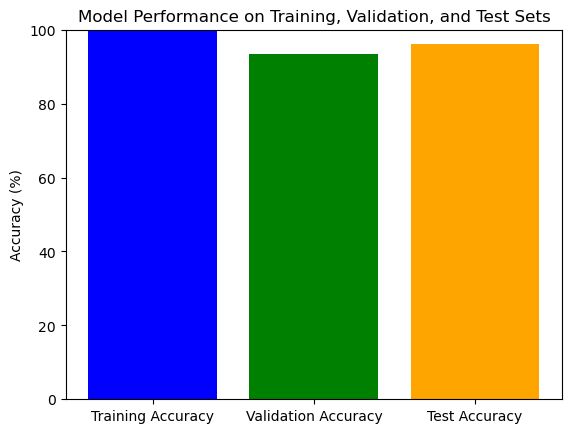

In [53]:
import matplotlib.pyplot as plt

scores = [train_accuracy * 100, val_accuracy * 100, test_accuracy * 100]
labels = ['Training Accuracy', 'Validation Accuracy', 'Test Accuracy']

plt.bar(labels, scores, color=['blue', 'green', 'orange'])
plt.ylabel('Accuracy (%)')
plt.title('Model Performance on Training, Validation, and Test Sets')
plt.ylim(0, 100)
plt.show()
